# –ß–∞—Å—Ç—å 1

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
import optuna
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.cluster import KMeans, DBSCAN

–°—á–∏—Ç–∞–µ–º –¥–∞–Ω–Ω—ã–µ

In [2]:
df = pd.read_csv("https://www.dropbox.com/s/glmbcyopi24m2ni/final_project_data.csv?dl=1")

df.head()

key          pickup_datetime  pickup_longitude  \
0   2011-11-23 14:36:35.0000003  2011-11-23 14:36:35 UTC        -73.959075   
1  2013-09-14 21:40:00.00000016  2013-09-14 21:40:00 UTC        -73.931612   
2   2012-04-30 18:13:19.0000002  2012-04-30 18:13:19 UTC        -73.997929   
3   2010-10-22 15:03:47.0000001  2010-10-22 15:03:47 UTC        -73.980608   
4   2011-02-18 18:08:16.0000002  2011-02-18 18:08:16 UTC        -74.008884   

   pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  \
0        40.783316         -73.959087         40.783345              1.0   
1        40.771060         -73.929097         40.760542              1.0   
2        40.740983         -74.007197         40.727725              2.0   
3        40.742449         -73.985609         40.755807              1.0   
4        40.720314         -73.983280         40.722350              1.0   

   fare_amount  
0          2.5  
1          5.5  
2          6.5  
3          6.5  
4         12.1

## –ò—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö

In [4]:
df.info()
print('------')
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615962 entries, 0 to 615961
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                615962 non-null  object 
 1   pickup_datetime    615962 non-null  object 
 2   pickup_longitude   615962 non-null  float64
 3   pickup_latitude    615961 non-null  float64
 4   dropoff_longitude  615959 non-null  float64
 5   dropoff_latitude   615959 non-null  float64
 6   passenger_count    615961 non-null  float64
 7   fare_amount        615961 non-null  float64
dtypes: float64(6), object(2)
memory usage: 37.6+ MB
------
key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      1
dropoff_longitude    3
dropoff_latitude     3
passenger_count      1
fare_amount          1
dtype: int64


In [3]:
# –£–¥–∞–ª–∏–º —Å—Ç—Ä–æ–∫–∏ —Å –ø—Ä–æ–ø—É—Å–∫–∞–º–∏

df.dropna(axis=0, inplace=True)

In [9]:
df.shape

(615959, 8)

In [4]:
# –£–¥–∞–ª–∏–º –∏–∑ –¥–∞–Ω–Ω—ã—Ö –∫–æ–ª–æ–Ω–∫—É key, —Ç–∞–∫ –∫–∞–∫ –≤ –Ω–µ–π –¥—É–±–ª–∏—Ä—É–µ—Ç—Å—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –∏–∑ pickup_datetime

df.drop('key', axis=1, inplace=True)

In [ ]:
# –û–±—Ä–∞–±–æ—Ç–∞–µ–º –∫–æ–ª–æ–Ω–∫—É `pickup_datetime`. –í—ã–¥–µ–ª–∏—Ç–µ –∏–∑ –Ω–µ–µ 4 –Ω–æ–≤—ã—Ö —Å—Ç–æ–ª–±—Ü–∞:

* `year` - –≥–æ–¥ –ø–æ–µ–∑–¥–∫–∏
* `month` - –º–µ—Å—è—Ü –ø–æ–µ–∑–¥–∫–∏
* `day` - –¥–µ–Ω—å –ø–æ–µ–∑–¥–∫–∏
* `hour` - —á–∞—Å –ø–æ–µ–∑–¥–∫–∏

–ó–∞—Ç–µ–º —É–¥–∞–ª–∏–º —Å—Ç–æ–ª–±–µ—Ü `pickup_datetime`.



In [5]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['day'] = df['pickup_datetime'].dt.day
df['hour'] = df['pickup_datetime'].dt.hour


In [6]:
df.drop('pickup_datetime', axis=1, inplace=True)
df

pickup_longitude  pickup_latitude  dropoff_longitude  \
0             -73.959075        40.783316         -73.959087   
1             -73.931612        40.771060         -73.929097   
2             -73.997929        40.740983         -74.007197   
3             -73.980608        40.742449         -73.985609   
4             -74.008884        40.720314         -73.983280   
...                  ...              ...                ...   
615956        -73.979049        40.736143         -73.980528   
615957        -73.976600        40.745290         -73.980242   
615958        -73.987750        40.745760         -73.953092   
615959        -73.983165        40.728207         -74.002797   
615960        -73.985612        40.727010         -73.956318   

        dropoff_latitude  passenger_count  fare_amount  year  month  day  hour  
0              40.783345              1.0          2.5  2011     11   23    14  
1              40.760542              1.0          5.5  2013      9   14    21  
2              40.727725              2.0          6.5  2012      4   30    18  
3              40.755807              1.0          6.5  2010     10   22    15  
4              40.722350              1.0         12.1  2011      2   18    18  
...                  ...              ...          ...   ...    ...  ...   ...  
615956         40.730353              1.0          5.5  2013     12    1     0  
615957         40.759672              2.0         10.5  2014      5    6    20  
615958         40.776787              1.0         10.9  2012      1   31     0  
615959         40.728670              1.0          7.5  2014      7   28     0  
615960         40.694497              2.0         22.5  2014      5    7     2  

[615959 rows x 10 columns]

## –í–æ–ø—Ä–æ—Å—ã –ø–æ –¥–∞–Ω–Ω—ã–º

In [28]:
# –í –∫–∞–∫–∏–µ –≥–æ–¥—ã —Å–æ–≤–µ—Ä—à–∞–ª–∏—Å—å –ø–æ–µ–∑–¥–∫–∏?

df['year'].value_counts().index.sort_values()

Index([2009, 2010, 2011, 2012, 2013, 2014, 2015], dtype='int32', name='year')

In [32]:
# –í –∫–∞–∫–æ–π —á–∞—Å –±—ã–ª–æ —Å–æ–≤–µ—Ä—à–µ–Ω–æ –±–æ–ª—å—à–µ –≤—Å–µ–≥–æ –ø–æ–µ–∑–¥–æ–∫?

df['hour'].value_counts().index[0]

19

In [54]:
# –í –∫–∞–∫–æ–π —Å–µ–∑–æ–Ω (–∑–∏–º–∞, –≤–µ—Å–Ω–∞, –ª–µ—Ç–æ, –æ—Å–µ–Ω—å) –±—ã–ª–æ —Å–æ–≤–µ—Ä—à–µ–Ω–æ –Ω–∞–∏–º–µ–Ω—å—à–µ–µ —á–∏—Å–ª–æ –ø–æ–µ–∑–¥–æ–∫?

group_month = df.groupby('month')
group_month.size()

month
1     54827
2     52204
3     58039
4     56445
5     57758
6     55417
7     46723
8     44231
9     47044
10    49656
11    46673
12    46942
dtype: int64

<Axes: xlabel='pickup_latitude', ylabel='pickup_longitude'>

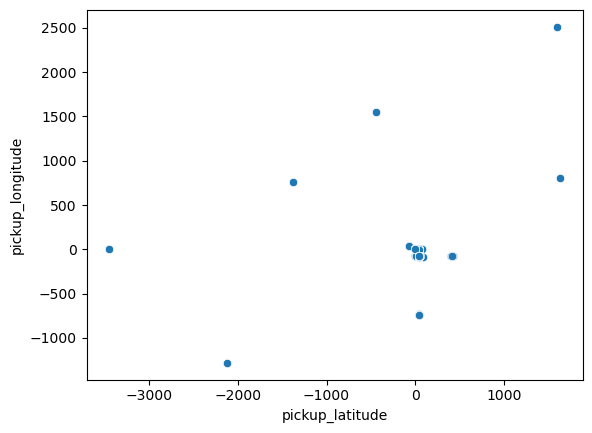

In [56]:
# –ü–æ—Å—Ç—Ä–æ–∏–º scatter plot –≤ –æ—Å—è—Ö pickup_latitude –∏ pickup_longitude

sns.scatterplot(data=df, x='pickup_latitude', y='pickup_longitude')

<Axes: >

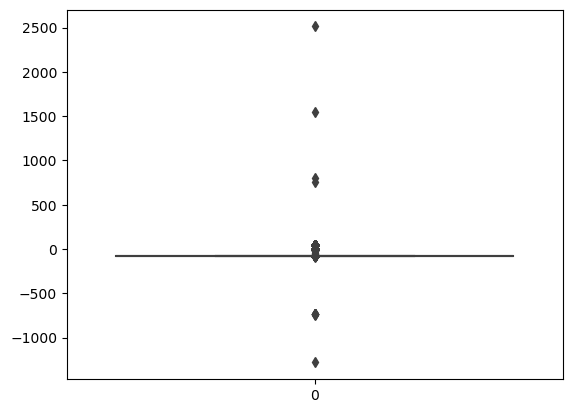

In [57]:
# –ü–æ—Å—Ç—Ä–æ–∏–º —è—â–∏–∫ —Å —É—Å–∞–º–∏ boxplot –¥–ª—è pickup_longitude

sns.boxplot(df['pickup_longitude'])

In [58]:
# –ß–µ–º—É —Ä–∞–≤–Ω–∞ –º–µ–¥–∏–∞–Ω–∞ pickup_longitude

df['pickup_longitude'].median()

-73.981803

<Axes: xlabel='hour', ylabel='Count'>

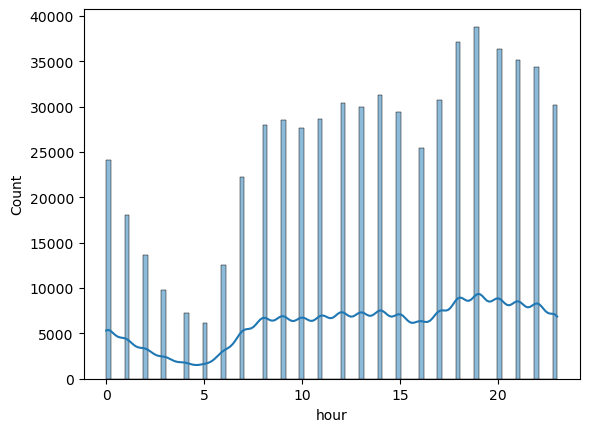

In [59]:
# –ü–æ—Å—Ç—Ä–æ–π—Ç–µ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—É —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–∞ hour

sns.histplot(df['hour'])

<Axes: xlabel='year', ylabel='month'>

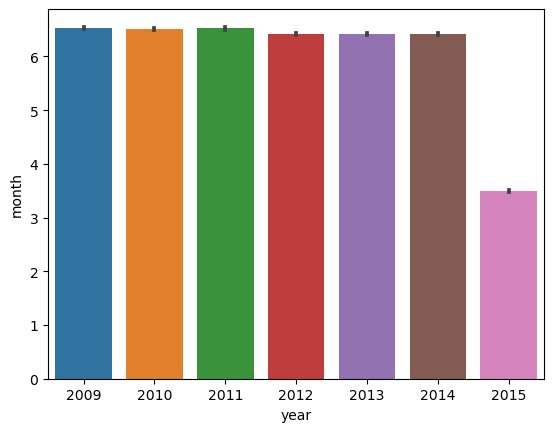

In [63]:
# –í–∏–¥–∏–º, —á—Ç–æ –≤ 2015 –≥–æ–¥—É —Å–æ–≤–µ—Ä—à–∞–ª–æ—Å—å –º–µ–Ω—å—à–µ –ø–æ–µ–∑–¥–æ–∫

sns.barplot(x=df['year'], y=df['month'])

<Axes: xlabel='year', ylabel='fare_amount'>

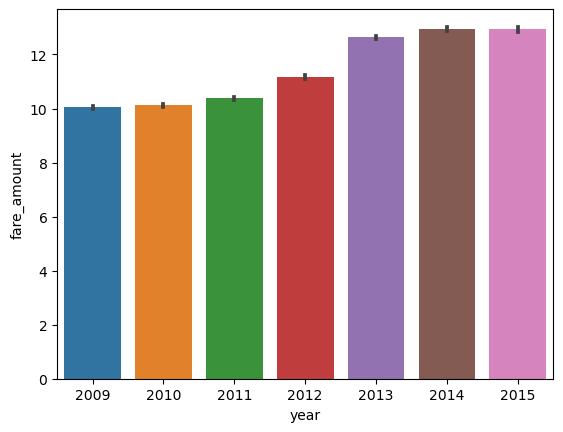

In [72]:
# –ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ target –æ—Ç year

sns.barplot(x=df['year'], y=df['fare_amount'], )

<Axes: xlabel='fare_amount', ylabel='Count'>

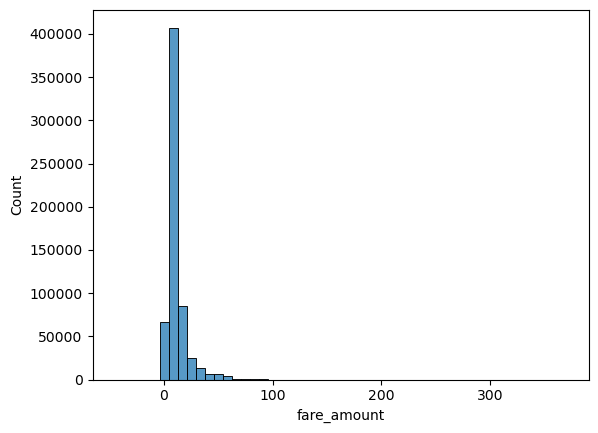

In [76]:
# –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ü–µ–ª–∏ - –ª–æ–≥–Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ

sns.histplot(df['fare_amount'], bins=50)

/Users/aleksandrbogdanov/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/aleksandrbogdanov/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='fare_amount', ylabel='Count'>

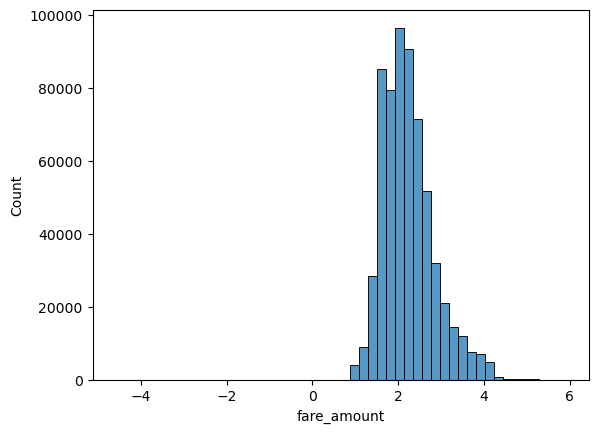

In [79]:
# –ü—Ä–∏–≤–µ–¥–µ–º –≤ –Ω–æ—Ä–º —Ä-–Ω–∏–µ

sns.histplot(np.log(df['fare_amount']), bins=50)

## –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ baseline-–º–æ–¥–µ–ª–∏

In [8]:
X = df.drop('fare_amount', axis=1)
y = df['fare_amount']

In [85]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)
Xtrain.shape

(461969, 9)

In [86]:
# –û–±—É—á–∏–º —Ä–µ—à–∞—é—â–µ–µ –¥–µ—Ä–µ–≤–æ –≥–ª—É–±–∏–Ω—ã 3 –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö


from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

tree = DecisionTreeRegressor(max_depth=3, random_state=42)
tree.fit(Xtrain, ytrain)

preds_tree = tree.predict(Xtest)

r2_score(ytest, preds_tree)

0.4998349394485503

In [88]:
# –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤.

feach_importance_tree = pd.DataFrame(tree.feature_importances_, index=Xtrain.columns).sort_values(by=0, 
                                                                                                  ascending=False)
feach_importance_tree

0
dropoff_longitude  0.637263
pickup_longitude   0.311747
pickup_latitude    0.050990
dropoff_latitude   0.000000
passenger_count    0.000000
year               0.000000
month              0.000000
day                0.000000
hour               0.000000

([<matplotlib.axis.YTick at 0x2b3ffe090>,
 [Text(0, 0, 'hour'),
  Text(0, 1, 'day'),
  Text(0, 2, 'month'),
  Text(0, 3, 'year'),
  Text(0, 4, 'passenger_count'),
  Text(0, 5, 'dropoff_latitude'),
  Text(0, 6, 'pickup_latitude'),
  Text(0, 7, 'pickup_longitude'),
  Text(0, 8, 'dropoff_longitude')])

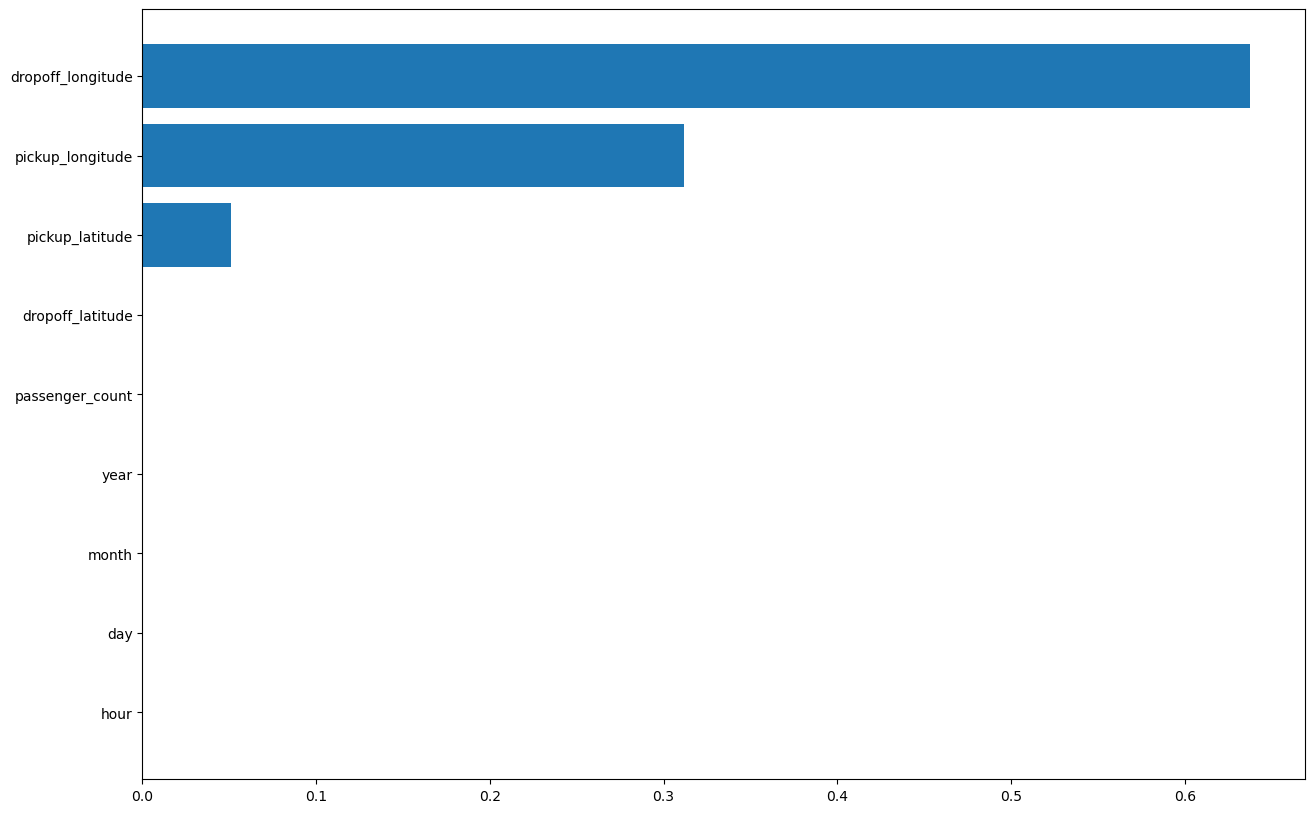

In [94]:
plt.figure(figsize=(15, 10))

plt.barh(range(len(feach_importance_tree.values)), feach_importance_tree.values.flatten()[::-1], align='center')
plt.yticks(range(len(feach_importance_tree.index)), feach_importance_tree.index[::-1])

## –£–ª—É—á—à–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏

In [9]:
# –ó–∞–º–µ–Ω–∏–º –≤—Å–µ –∑–Ω–∞—á–µ–Ω–∏—è  ùë¶, –º–µ–Ω—å—à–∏–µ 0, –Ω–∞ 0.
# –°–¥–µ–ª–∞–µ–º –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –ø–æ –ø—Ä–∞–≤–∏–ª—É  ùë¶ùëõùëíùë§=ùëõùëù.ùëôùëúùëî1ùëù(ùë¶)

y = y.apply(lambda x: 0 if x < 0 else x)
ynew = np.log1p(y)


<Axes: xlabel='fare_amount', ylabel='Count'>

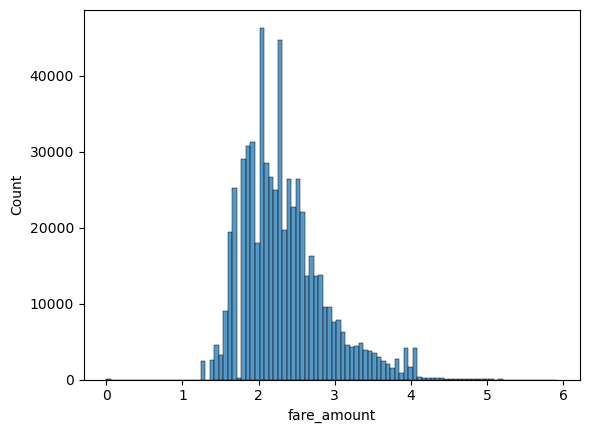

In [98]:
sns.histplot(ynew, bins=100)

In [99]:
Xtrain, Xtest, ytrain_new, ytest_new = train_test_split(X, ynew, test_size=0.25, random_state=42)
Xtrain.shape

(461969, 9)

In [102]:
tree_new = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_new.fit(Xtrain, ytrain_new)

preds_tree_new = tree_new.predict(Xtest)

r2_score(np.expm1(ytest_new), np.expm1(preds_tree_new))

0.44346012656908607

In [104]:
# –ü–æ–¥–±–µ—Ä–∏—Ç–µ –ø–æ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏ –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –≥–ª—É–±–∏–Ω—É –¥–µ—Ä–µ–≤–∞ –≤ –¥–∏–∞–ø–∞–∑–æ–Ω–µ –æ—Ç 3 –¥–æ 10 –≤–∫–ª—é—á–∏—Ç–µ–ª—å–Ω–æ —Å —à–∞–≥–æ–º 1 (random_state=42).
# cv=3, scoring=r2

params_tree = {
    'max_depth': np.arange(3, 11, 1)
}

gs_tree = GridSearchCV(DecisionTreeRegressor(random_state=42), params_tree, cv=3, scoring='r2')

gs_tree.fit(Xtrain, ytrain_new)

gs_tree.best_score_, gs_tree.best_estimator_

(0.5616182564633098, DecisionTreeRegressor(max_depth=10, random_state=42))

In [105]:
tree_best = gs_tree.best_estimator_

tree_best.fit(Xtrain, ytrain_new)

preds_tree_best = tree_best.predict(Xtest)
r2_score(np.expm1(ytest_new), np.expm1(preds_tree_best))

0.6884366399590435

## –£—Å–ª–æ–∂–Ω–µ–Ω–∏–µ –ø–∞–π–ø–ª–∞–π–Ω–∞

In [106]:
# –°–æ–∑–¥–∞–¥–∏–º pipeline, –≤ –∫–æ—Ç–æ—Ä–æ–º —Å–Ω–∞—á–∞–ª–∞ –∏–∑–≤–ª–µ—á–µ–º –ø–æ–ª–∏–Ω–æ–º–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ —Å—Ç–µ–ø–µ–Ω–∏ 2 –∏–∑ –¥–∞–Ω–Ω—ã—Ö,
# –∞ –∑–∞—Ç–µ–º –æ–±—É—á–∏–º —Ä–µ—à–∞—é—â–µ–µ –¥–µ—Ä–µ–≤–æ –≥–ª—É–±–∏–Ω—ã 3 —Å random_state=42.

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

p1 = Pipeline([
    ('features', PolynomialFeatures(degree=2)),
    ('model', DecisionTreeRegressor(max_depth=3, random_state=42))
])

In [107]:
p1.fit(Xtrain, ytrain_new)
preds_p1 = p1.predict(Xtest)
r2_score(np.expm1(ytest_new), np.expm1(preds_p1))

0.4173231422216578

In [120]:
# –û–ø—Ä–µ–¥–µ–ª—è–µ–º Pipeline
p2 = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('model', DecisionTreeRegressor(random_state=42))
])

# –û–ø—Ä–µ–¥–µ–ª—è–µ–º —Å–µ—Ç–∫—É –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –¥–ª—è GridSearchCV
params_grid = {
    'poly__degree': [2],  # –ü–∞—Ä–∞–º–µ—Ç—Ä –¥–ª—è PolynomialFeatures
    'model__max_depth': np.arange(3, 11, 1)  # –ü–∞—Ä–∞–º–µ—Ç—Ä –¥–ª—è DecisionTreeRegressor
}

# –°–æ–∑–¥–∞–µ–º –æ–±—ä–µ–∫—Ç GridSearchCV
gs_tree_p2 = GridSearchCV(p2, params_grid, cv=3, scoring='r2')

# –ü—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ—Ç—Å—è, —á—Ç–æ Xtrain –∏ ytrain_new –æ–ø—Ä–µ–¥–µ–ª–µ–Ω—ã
gs_tree_p2.fit(Xtrain, ytrain_new)

# –í—ã–≤–æ–¥–∏–º –ª—É—á—à—É—é –æ—Ü–µ–Ω–∫—É –∏ –ª—É—á—à–∏–π –æ—Ü–µ–Ω—â–∏–∫
print(gs_tree_p2.best_score_)
print(gs_tree_p2.best_estimator_)

0.6660345220391574
Pipeline(steps=[('poly', PolynomialFeatures()),
                ('model',
                 DecisionTreeRegressor(max_depth=10, random_state=42))])


In [122]:
model_p2 = gs_tree_p2.best_estimator_
model_p2.fit(Xtrain, ytrain_new)
preds_p2 = model_p2.predict(Xtest)
r2_score(np.expm1(ytest_new), np.expm1(preds_p2))

0.7141815704902021

## Feature selection

In [123]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, Ridge


In [125]:
# –î–æ–±–∞–≤–∏–º –≤ –ø—Ä–µ–¥—ã–¥—É—â–∏–π –ø–∞–π–ø–ª–∞–π–Ω: –ø–æ—Å–ª–µ –¥–æ–±–∞–≤–ª–µ–Ω–∏—è –ø–æ–ª–∏–Ω–æ–º–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ - StandardScaler
# –∑–∞—Ç–µ–º - —Å–Ω–∏–∂–µ–Ω–∏–µ —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ –ø—Ä–∏ –ø–æ–º–æ—â–∏ –º–µ—Ç–æ–¥–∞ SelectFromModel —Å –º–æ–¥–µ–ª—å—é Ridge —Å –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ –ø–æ —É–º–æ–ª—á–∞–Ω–∏—é.

p3 = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('scaler', StandardScaler()),
    ('selectror', SelectFromModel(Ridge())),
    ('model', DecisionTreeRegressor(random_state=42))
])


In [126]:
p3.fit(Xtrain, ytrain_new)
preds_p3 = p3.predict(Xtest)
r2_score(np.expm1(ytest_new), np.expm1(preds_p3))


0.6086933329018949

In [138]:
params_p3 = {
    'poly__degree': [2],
    'model__max_depth': np.arange(3, 11, 1)
}

gs_tree_p3 = GridSearchCV(p3, params_p3, cv=3, scoring='r2')

gs_tree_p3.fit(Xtrain, ytrain_new)

gs_tree_p3.best_score_, gs_tree_p3.best_estimator_

(0.6046864701480109,
 Pipeline(steps=[('poly', PolynomialFeatures()), ('scaler', StandardScaler()),
                 ('selectror', SelectFromModel(estimator=Ridge())),
                 ('model',
                  DecisionTreeRegressor(max_depth=10, random_state=42))]))

In [139]:
model_p3 = gs_tree_p3.best_estimator_
model_p3.fit(Xtrain, ytrain_new)
preds_p3 = model_p3.predict(Xtest)
r2_score(np.expm1(ytest_new), np.expm1(preds_p3))

0.6698534940345506

### Quiz

–£–¥–∞–ª–æ—Å—å –ª–∏ –ø—Ä–∏ –ø–æ–º–æ—â–∏ –ø–∞–π–ø–ª–∞–π–Ω–∞ —Å –æ—Ç–±–æ—Ä–æ–º –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —É–ª—É—á—à–∏—Ç—å —Ä–µ–∑—É–ª—å—Ç–∞—Ç –ø—Ä–µ–¥—ã–¥—É—â–µ–π –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏?

In [ ]:
# –ù–µ—Ç, –Ω–µ —É–¥–∞–ª–æ—Å—å (

## –ö–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

–ü—Ä–∏–∑–Ω–∞–∫–∏ month, day, hour - –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ


–ü–æ–ø—Ä–æ–±—É–µ–º –ø–æ–¥—Ö–æ–¥: –≥—Ä—É–ø–ø–∏—Ä–æ–≤–∫–∞ –∑–Ω–∞—á–µ–Ω–∏–π –ø—Ä–∏–∑–Ω–∞–∫–∞ + –¥–∞–ª—å–Ω–µ–π—à–∞—è OneHot-–∫–æ–¥–∏—Ä–æ–≤–∫–∞.

–∫–æ–ª–æ–Ω–∫–∏ winter, spring, summer, autumn - –≤ –∫–∞–∂–¥—É—é –∏–∑ –∫–æ—Ç–æ—Ä—ã—Ö –ø–∏—à–µ–º 1, –µ—Å–ª–∏ –º–µ—Å—è—Ü –æ—Ç–Ω–æ—Å–∏—Ç—Å—è –∫ —Å–µ–∑–æ–Ω—É, –∏ 0 –∏–Ω–∞—á–µ.

–∫–æ–ª–æ–Ω–∫–∏ start_month, middle_month, end_month - –≤ –∫–∞–∂–¥—É—é –∫–æ–ª–æ–Ω–∫—É –ø–∏—à–µ–º 1, –µ—Å–ª–∏ –¥–µ–Ω—å –æ—Ç–Ω–æ—Å–∏—Ç—Å—è –∫ –Ω–∞—á–∞–ª—É –º–µ—Å—è—Ü–∞ (1-10 —á–∏—Å–ª–æ), —Å–µ—Ä–µ–¥–∏–Ω–µ –º–µ—Å—è—Ü–∞ (11-20 —á–∏—Å–ª–æ), –∫–æ–Ω—Ü—É –º–µ—Å—è—Ü–∞ (–æ—Ç 21 —á–∏—Å–ª–∞), –∏ 0 –∏–Ω–∞—á–µ.

–∫–æ–ª–æ–Ω–∫–∏ night, morning, day, evening –ø–æ –∞–Ω–∞–ª–æ–≥–∏–∏. –ï—Å–ª–∏ —á–∞—Å - –æ—Ç 23 –¥–æ 5, —Ç–æ —ç—Ç–æ night, –æ—Ç 6 –¥–æ 11 - morning, –æ—Ç 12 –¥–æ 16 - day, –æ—Ç 17 –¥–æ 22 - evening.

–ü–æ—Å–ª–µ —Å–æ–∑–¥–∞–Ω–∏—è –Ω–æ–≤—ã—Ö –∫–æ–ª–æ–Ω–æ–∫ —É–¥–∞–ª–∏–º –∫–æ–ª–æ–Ω–∫–∏ month, day, hour.



In [7]:
df['winter'] = df['month'].apply(lambda x: 1 if x in [12, 1, 2] else 0)
df['spring'] = df['month'].apply(lambda x: 1 if x in [3,4,5] else 0)
df['summer'] = df['month'].apply(lambda x: 1 if x in [6,7,8] else 0)
df['autumn'] = df['month'].apply(lambda x: 1 if x in [9,10,11] else 0)


In [8]:
df['start_month'] = df['day'].apply(lambda x: 1 if x in np.arange(1, 11) else 0)
df['middle_month'] = df['day'].apply(lambda x: 1 if x in np.arange(11, 21) else 0)
df['end_month'] = df['day'].apply(lambda x: 1 if x > 21 else 0)


In [9]:
df['night'] = df['hour'].apply(lambda x: 1 if x in [23, 0, 1, 2, 3, 4, 5] else 0)
df['morning'] = df['hour'].apply(lambda x: 1 if x in np.arange(6, 12) else 0)
df['day'] = df['hour'].apply(lambda x: 1 if x in np.arange(12, 17) else 0)
df['evening'] = df['hour'].apply(lambda x: 1 if x in np.arange(17, 23) else 0)

In [10]:
df.drop(['month', 'day', 'hour'], axis=1, inplace=True)

In [291]:
df.shape

(615959, 17)

In [11]:
X = df.drop('fare_amount', axis=1)
y = df['fare_amount']

In [12]:
y = y.apply(lambda x: 0 if x < 0 else x)
ynew = np.log1p(y)

Xtrain, Xtest, ytrain_new, ytest_new = train_test_split(X, ynew, test_size=0.25, random_state=42)
Xtrain.shape

(461969, 16)

In [192]:
params_new_feat_tree = {
    'max_depth': np.arange(3, 11, 1)
}

gs_tree_new_ft = GridSearchCV(DecisionTreeRegressor(random_state=42), params_new_feat_tree, cv=3, scoring='r2')

gs_tree_new_ft.fit(Xtrain, ytrain_new)

gs_tree_new_ft.best_score_, gs_tree_new_ft.best_estimator_


(0.5625604250448296, DecisionTreeRegressor(max_depth=10, random_state=42))

In [193]:
model_3_new = gs_tree_new_ft.best_estimator_
model_3_new.fit(Xtrain, ytrain_new)
preds_3_new = model_3_new.predict(Xtest)
r2_score(np.expm1(ytest_new), np.expm1(preds_3_new))

0.6818619932356063

In [195]:
feature_importanc = pd.DataFrame(model_3_new.feature_importances_,
                                 index=Xtrain.columns).sort_values(by=0, ascending=False)
feature_importanc

0
dropoff_longitude  0.417100
pickup_longitude   0.237037
dropoff_latitude   0.188100
pickup_latitude    0.128473
year               0.027483
passenger_count    0.000606
autumn             0.000260
night              0.000211
morning            0.000196
middle_month       0.000155
start_month        0.000117
summer             0.000090
winter             0.000088
evening            0.000042
end_month          0.000023
spring             0.000019

### Quiz

–ö–∞–∫–æ–π –∏–∑ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, —Å–≤—è–∑–∞–Ω–Ω—ã—Ö —Å –¥–∞—Ç–æ–π –ø–æ–µ–∑–¥–∫–∏, —Å–∞–º—ã–π –≤–∞–∂–Ω—ã–π –¥–ª—è –º–æ–¥–µ–ª–∏?

In [ ]:
# --> year

## –ö–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è –∏ –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è

In [ ]:
# –û—Å—Ç–∞–≤–∏–º —Ç–æ–ª—å–∫–æ —Ç–µ —Å—Ç—Ä–æ—á–∫–∏ –≤ —Ç–∞–±–ª–∏—Ü–µ df (–ø–æ—Å–ª–µ —É–¥–∞–ª–µ–Ω–∏—è –ø—Ä–æ–ø—É—Å–∫–æ–≤), –¥–ª—è –∫–æ—Ç–æ—Ä—ã—Ö –≤—ã–ø–æ–ª–Ω–µ–Ω—ã –æ–±–∞ —É—Å–ª–æ–≤–∏—è:

# dropoff_latitude  ‚àà(39;41)
 
# dropoff_longitude  ‚àà(‚àí75;‚àí72)

In [13]:
df = df[(df['dropoff_latitude'] > 39) & (df['dropoff_latitude'] < 41)]
df = df[(df['dropoff_longitude'] > -75) & (df['dropoff_longitude'] < -72)]

<Axes: xlabel='dropoff_longitude', ylabel='fare_amount'>

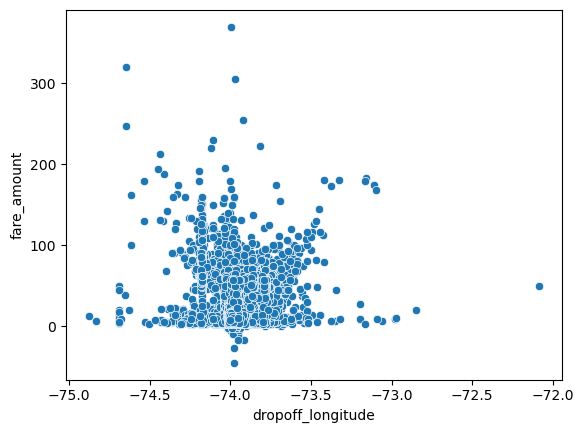

In [199]:
sns.scatterplot(x=df['dropoff_longitude'], y=df['fare_amount'])

In [14]:
df_long_lat = df[['dropoff_latitude', 'dropoff_longitude']]
df_long_lat

dropoff_latitude  dropoff_longitude
0              40.783345         -73.959087
1              40.760542         -73.929097
2              40.727725         -74.007197
3              40.755807         -73.985609
4              40.722350         -73.983280
...                  ...                ...
615956         40.730353         -73.980528
615957         40.759672         -73.980242
615958         40.776787         -73.953092
615959         40.728670         -74.002797
615960         40.694497         -73.956318

[603729 rows x 2 columns]

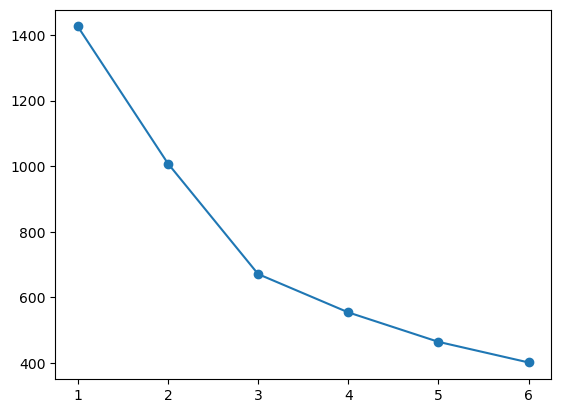

In [206]:
# –ò—Å–ø–æ–ª—å–∑—É–µ–º –º–µ—Ç–æ–¥ –ª–æ–∫—Ç—è –¥–ª—è –ø–æ–Ω–∏–º–∞–Ω–∏—è –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤

from sklearn.cluster import KMeans

distortions = []

for k in range(1, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_long_lat)
    
    distortions.append(kmeans.inertia_)

plt.plot(np.arange(1, 7), distortions, marker = 'o')

/Users/aleksandrbogdanov/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


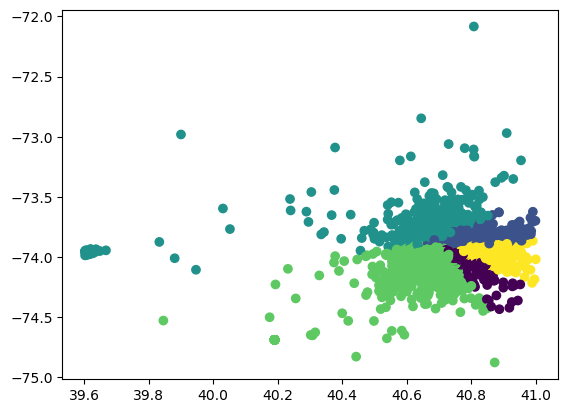

In [15]:
# –í–æ–∑—å–º–µ–º 5 –∫–ª–∞—Å—Ç–µ—Ä–æ–≤
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)

kmeans.fit(df_long_lat)

plt.scatter(df_long_lat.loc[:, 'dropoff_latitude'], df_long_lat.loc[:, 'dropoff_longitude'], c=kmeans.labels_)

In [16]:
# –°–æ–∑–¥–∞–¥–∏–º –Ω–æ–≤—ã–π –ø—Ä–∏–∑–Ω–∞–∫ clusters

df['clusters'] = kmeans.labels_

In [22]:
df['clusters'].value_counts()

clusters
0    295518
4    143058
3    137405
1     20731
2      7017
Name: count, dtype: int64

In [23]:
# –°—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ —Å—Ç–æ–∏–º–æ—Å—Ç–∏ –ø–æ–µ–∑–¥–∫–∏ –ø–æ –∫–ª–∞—Å—Ç–µ—Ä–∞–º

mean_clusters = df.groupby('clusters')['fare_amount'].mean()
mean_clusters

clusters
0     9.576575
1    23.940778
2    40.123088
3    12.652495
4    10.333062
Name: fare_amount, dtype: float64

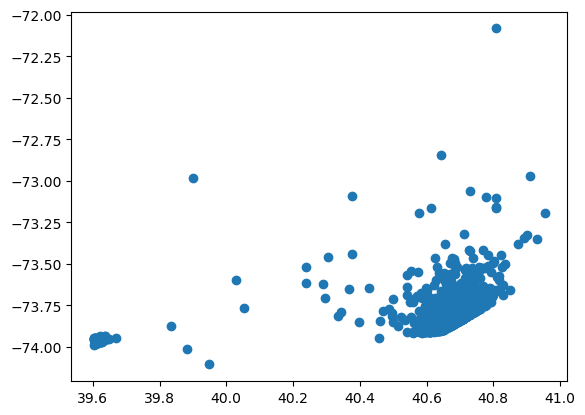

In [23]:
# –Ω–∞—Ä–∏—Å—É–µ–º –∫–ª–∞—Å—Ç–µ—Ä —Å –Ω–∞–∏–±–æ–ª—å—à–µ–π —Å—Ä–µ–¥–Ω–µ–π —Å—Ç–æ–∏–º–æ—Å—Ç—å—é –ø–æ–µ–∑–¥–∫–∏

df_max_avg_fares = df_long_lat[df['clusters'] == 2]

plt.scatter(df_max_avg_fares['dropoff_latitude'], df_max_avg_fares['dropoff_longitude'])

–ö–ª–∞—Å—Ç–µ—Ä–∏–∑—É–µ–º —Ç–æ—á–∫–∏ —ç—Ç–æ–≥–æ –∫–ª–∞—Å—Ç–µ—Ä–∞ –ø—Ä–∏ –ø–æ–º–æ—â–∏ DBSCAN —Å –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ eps=0.15, min_samples=10.

–í—ã—á–∏—Å–ª–∏–º –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç—ã —Ü–µ–Ω—Ç—Ä–∞ (—Å—Ä–µ–¥–Ω–µ–µ –∞—Ä–∏—Ñ–º–µ—Ç—Ä–∏—á–µ—Å–∫–æ–µ) –º–µ–Ω—å—à–µ–≥–æ –∫–ª–∞—Å—Ç–µ—Ä–∞.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


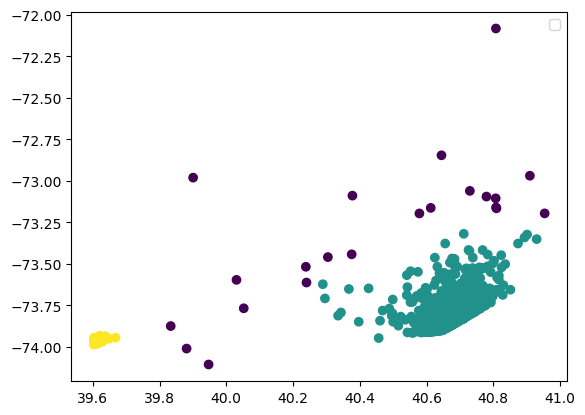

In [26]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.15, min_samples=10)

dbscan.fit(df_max_avg_fares)

plt.scatter(df_max_avg_fares.iloc[:, 0], df_max_avg_fares.iloc[:, 1], c=dbscan.labels_)
plt.legend()

In [252]:
df_max_avg_fares['dropoff_latitude'][df_max_avg_fares['clusters'] == 1].mean()

39.6163248012393

FeachEngeneering

In [17]:
# –ù–æ–≤—ã–π –ø—Ä–∏–∑–Ω–∞–∫ - —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ –ø–æ–µ–∑–¥–∫–∏ - –ø–æ —Ñ–æ—Ä–º—É–ª–µ –≥–∞–≤–µ—Ä—Å–∏–Ω—É—Å–∞

import math

def haversine(lat1, lon1, lat2, lon2):
    """
    –í—ã—á–∏—Å–ª—è–µ—Ç —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ –º–µ–∂–¥—É –¥–≤—É–º—è —Ç–æ—á–∫–∞–º–∏ –Ω–∞ –ø–æ–≤–µ—Ä—Ö–Ω–æ—Å—Ç–∏ –ó–µ–º–ª–∏ –ø–æ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç–∞–º
    –≤ –≥—Ä–∞–¥—É—Å–∞—Ö —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º —Ñ–æ—Ä–º—É–ª—ã –≥–∞–≤–µ—Ä—Å–∏–Ω—É—Å–∞.
    """
    # –†–∞–¥–∏—É—Å –ó–µ–º–ª–∏ –≤ –∫–∏–ª–æ–º–µ—Ç—Ä–∞—Ö
    R = 6371.0

    # –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –≥—Ä–∞–¥—É—Å–æ–≤ –≤ —Ä–∞–¥–∏–∞–Ω—ã
    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    lat2_rad = np.radians(lat2)
    lon2_rad = np.radians(lon2)

    # –†–∞–∑–Ω–∏—Ü–∞ –º–µ–∂–¥—É —à–∏—Ä–æ—Ç–æ–π –∏ –¥–æ–ª–≥–æ—Ç–æ–π
    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad

    # –í—ã—á–∏—Å–ª–µ–Ω–∏–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è –ø–æ —Ñ–æ—Ä–º—É–ª–µ –≥–∞–≤–µ—Ä—Å–∏–Ω—É—Å–∞
    a = np.sin(dlat / 2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    distance = R * c

    return distance


# –ü—Ä–∏–º–µ—Ä –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç –¥–≤—É—Ö —Ç–æ—á–µ–∫ (–®–∏—Ä–æ—Ç–∞ –∏ –¥–æ–ª–≥–æ—Ç–∞ –≤ –≥—Ä–∞–¥—É—Å–∞—Ö)
lat_pickup = df['pickup_latitude'].values
lon_pickup = df['pickup_longitude'].values
lat_dropoff = df['dropoff_latitude'].values
lon_dropoff = df['dropoff_longitude'].values

# –í—ã—á–∏—Å–ª–µ–Ω–∏–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è –º–µ–∂–¥—É —ç—Ç–∏–º–∏ —Ç–æ—á–∫–∞–º–∏
distance_km = haversine(lat_pickup, lon_pickup, lat_dropoff, lon_dropoff)
distance_km

array([3.37922722e-03, 1.18857273e+00, 1.66827145e+00, ...,
       4.51922506e+00, 1.65508534e+00, 4.37798320e+00])

In [18]:
# –î–æ–±–∞–≤–∏–º –Ω–æ–≤—ã–π –ø—Ä–∏–∑–Ω–∞–∫ –≤ df

df['distance'] = distance_km
df

pickup_longitude  pickup_latitude  dropoff_longitude  \
0             -73.959075        40.783316         -73.959087   
1             -73.931612        40.771060         -73.929097   
2             -73.997929        40.740983         -74.007197   
3             -73.980608        40.742449         -73.985609   
4             -74.008884        40.720314         -73.983280   
...                  ...              ...                ...   
615956        -73.979049        40.736143         -73.980528   
615957        -73.976600        40.745290         -73.980242   
615958        -73.987750        40.745760         -73.953092   
615959        -73.983165        40.728207         -74.002797   
615960        -73.985612        40.727010         -73.956318   

        dropoff_latitude  passenger_count  fare_amount  year  winter  spring  \
0              40.783345              1.0          2.5  2011       0       0   
1              40.760542              1.0          5.5  2013       0       0   
2              40.727725              2.0          6.5  2012       0       1   
3              40.755807              1.0          6.5  2010       0       0   
4              40.722350              1.0         12.1  2011       1       0   
...                  ...              ...          ...   ...     ...     ...   
615956         40.730353              1.0          5.5  2013       1       0   
615957         40.759672              2.0         10.5  2014       0       1   
615958         40.776787              1.0         10.9  2012       1       0   
615959         40.728670              1.0          7.5  2014       0       0   
615960         40.694497              2.0         22.5  2014       0       1   

        summer  autumn  start_month  middle_month  end_month  night  morning  \
0            0       1            0             0          1      0        0   
1            0       1            0             1          0      0        0   
2            0       0            0             0          1      0        0   
3            0       1            0             0          1      0        0   
4            0       0            0             1          0      0        0   
...        ...     ...          ...           ...        ...    ...      ...   
615956       0       0            1             0          0      1        0   
615957       0       0            1             0          0      0        0   
615958       0       0            0             0          1      1        0   
615959       1       0            0             0          1      1        0   
615960       0       0            1             0          0      1        0   

        evening  clusters  distance  
0             0         4  0.003379  
1             1         4  1.188573  
2             1         3  1.668271  
3             0         0  1.543928  
4             1         3  2.169588  
...         ...       ...       ...  
615956        0         3  0.655768  
615957        1         0  1.628365  
615958        0         4  4.519225  
615959        0         3  1.655085  
615960        0         3  4.377983  

[603729 rows x 19 columns]

<Axes: >

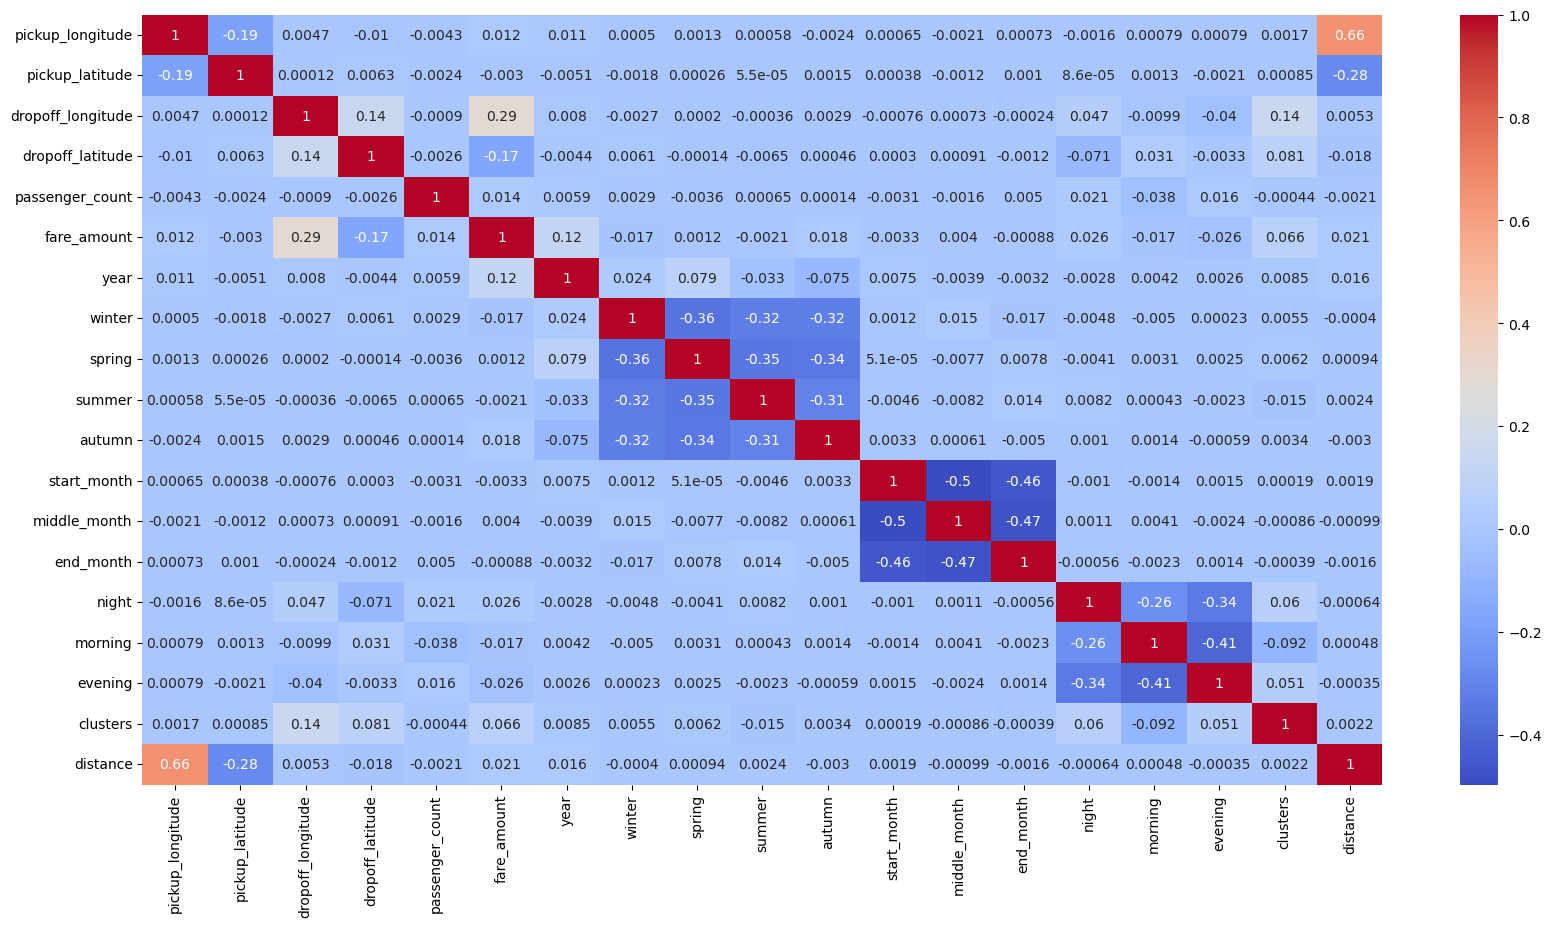

In [24]:
# –ü–æ—Å—Ç—Ä–æ–∏–º –º–∞—Ç—Ä–∏—Ü—É –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏

correl = df.corr()

plt.figure(figsize=(20, 10))

sns.heatmap(correl, cmap='coolwarm', annot=True)



In [27]:
# –£ distance –µ—Å—Ç—å –≤—ã–±—Ä–æ—Å—ã, –∫–∞–∫ –ø–æ–µ–∑–¥–∫–∏ –≤ 8000 –∫–º )
# –û—Ç—Ñ–∏–ª—å—Ç—Ä—É–µ–º –∏

dist_low = df[df['distance']< 140]

<Axes: xlabel='distance', ylabel='fare_amount'>

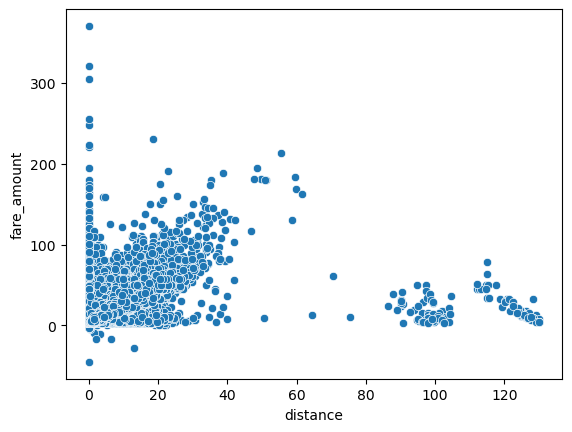

In [28]:
# –ü–æ–ø—Ä–æ–±—É–µ–º –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –∫–∞–∫ distance –≤–ª–∏—è–µ—Ç –Ω–∞ fare_amount

sns.scatterplot(x=dist_low['distance'], y=dist_low['fare_amount'])

In [349]:
# –¢—É—Ç –æ–±–µ—Ä–∑–∞–ª–∏—Å—å –≤—ã–±—Ä–æ—Å–æ–≤—ã–µ –ø–æ–µ–∑–¥–∫–∏ –∏ –æ—Å—Ç–∞–ª–∏—Å—å –±–æ–ª–µ–µ –º–µ–Ω–µ–µ –ª–æ–≥–∏—á–Ω—ã–µ
# –ù–æ –µ—Å—Ç—å –ø–æ–µ–∑–¥–∫–∏ –ø–æ–¥ 0 –∫–º —Å –æ–≥—Ä–æ–º–Ω–æ–π –ø–ª–∞—Ç–æ–π - –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –Ω–∏—Ö
# –ü–ª—é—Å –æ—Ç—Ä–µ–∑–∞—Ç—å –Ω–∞–¥–æ –ø–ª–∞—Ç—É < 0 –¥–æ–ª–ª–∞—Ä–æ–≤

In [355]:
df[df['fare_amount'] == 0]

pickup_longitude  pickup_latitude  dropoff_longitude  \
21427         -74.027115        40.752872         -74.027122   
82135         -73.937439        40.758160         -73.937439   
100317        -73.982119        40.761697         -73.984814   
129364        -73.791212        40.642660         -73.979791   
245008        -73.975174        40.750538         -73.977112   
247566        -73.995435        40.717126         -73.995158   
286768        -73.900775        40.758302         -73.900775   
315949        -73.685662        40.769571         -73.685611   
368408        -73.983101        40.765324         -73.994751   
426473        -73.989840        40.758272         -73.989697   
428309        -73.990913        40.724197         -73.994759   
483760        -73.992258        40.672983         -73.992258   
527199        -73.983105        40.771214         -73.782518   
553596        -73.987976        40.759102         -73.991676   
575422        -73.980146        40.754788         -73.784052   

        dropoff_latitude  passenger_count  fare_amount  year  winter  spring  \
21427          40.752895              0.0          0.0  2015       1       0   
82135          40.758160              1.0          0.0  2015       0       1   
100317         40.747882              1.0          0.0  2010       1       0   
129364         40.740578              1.0          0.0  2010       0       1   
245008         40.751740              1.0          0.0  2015       0       1   
247566         40.717684              1.0          0.0  2010       1       0   
286768         40.758302              1.0          0.0  2013       0       0   
315949         40.769482              1.0          0.0  2010       0       1   
368408         40.761780              1.0          0.0  2015       0       0   
426473         40.758500              1.0          0.0  2013       0       0   
428309         40.724915              1.0          0.0  2015       0       1   
483760         40.672983              2.0          0.0  2010       0       1   
527199         40.648816              3.0          0.0  2010       0       1   
553596         40.759632              2.0          0.0  2015       0       0   
575422         40.649019              1.0          0.0  2010       0       1   

        summer  autumn  start_month  middle_month  end_month  night  morning  \
21427        0       0            0             1          0      1        0   
82135        0       0            0             0          0      1        0   
100317       0       0            0             0          0      0        0   
129364       0       0            0             0          1      0        0   
245008       0       0            0             0          1      0        0   
247566       0       0            0             0          0      0        0   
286768       1       0            0             0          1      0        1   
315949       0       0            0             0          1      0        0   
368408       1       0            1             0          0      1        0   
426473       1       0            0             0          0      0        1   
428309       0       0            0             1          0      0        1   
483760       0       0            1             0          0      0        1   
527199       0       0            0             0          1      0        0   
553596       1       0            0             0          1      0        0   
575422       0       0            1             0          0      0        0   

        evening  clusters   distance  
21427         0         0   0.002625  
82135         0         4   0.000000  
100317        1         0   1.552840  
129364        0         0  19.270105  
245008        1         0   0.210949  
247566        1         3   0.066293  
286768        0         1   0.000000  
315949        0         2   0.010788  
368408        0         0   1.057347  
426473        0         0   0.0

<Axes: xlabel='distance', ylabel='fare_amount'>

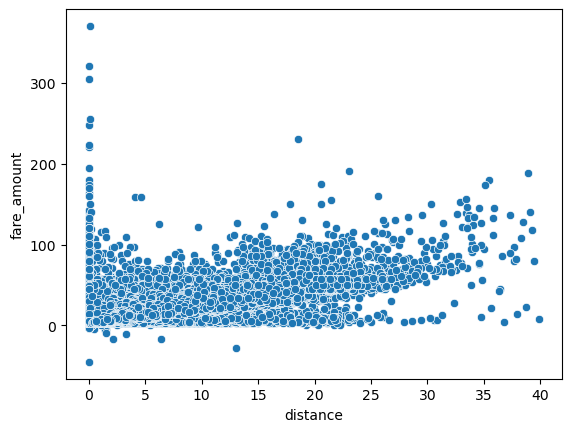

In [32]:
low_fares = df[df['distance'] < 40]

sns.scatterplot(x=low_fares['distance'], y=low_fares['fare_amount'])

<Axes: xlabel='distance', ylabel='fare_amount'>

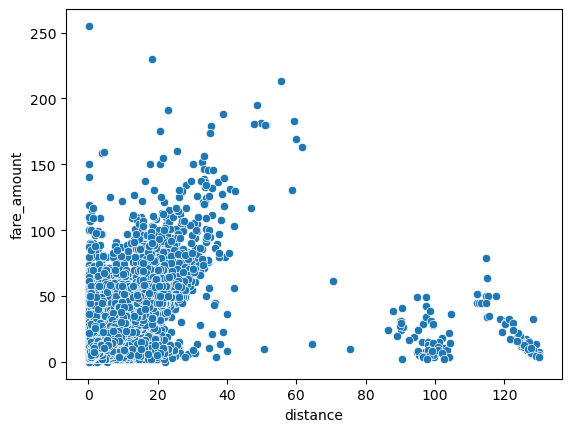

In [19]:
# –£–¥–∞–ª–∏–º –∏–∑ –¥–∞—Ç–∞—Å–µ—Ç–∞ 1) –≥–¥–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ > 140 –∫–º, 2) –≥–¥–µ –ø–ª–∞—Ç–∞ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω–∞ –∏ –≥–¥–µ –ø–ª–∞—Ç–∞ = 0

df_new = df[(df['distance'] < 140) & (df['distance'] > 1e-1) & (df['fare_amount'] > 0.0)]

sns.scatterplot(x=df_new['distance'], y=df_new['fare_amount'])


<Axes: >

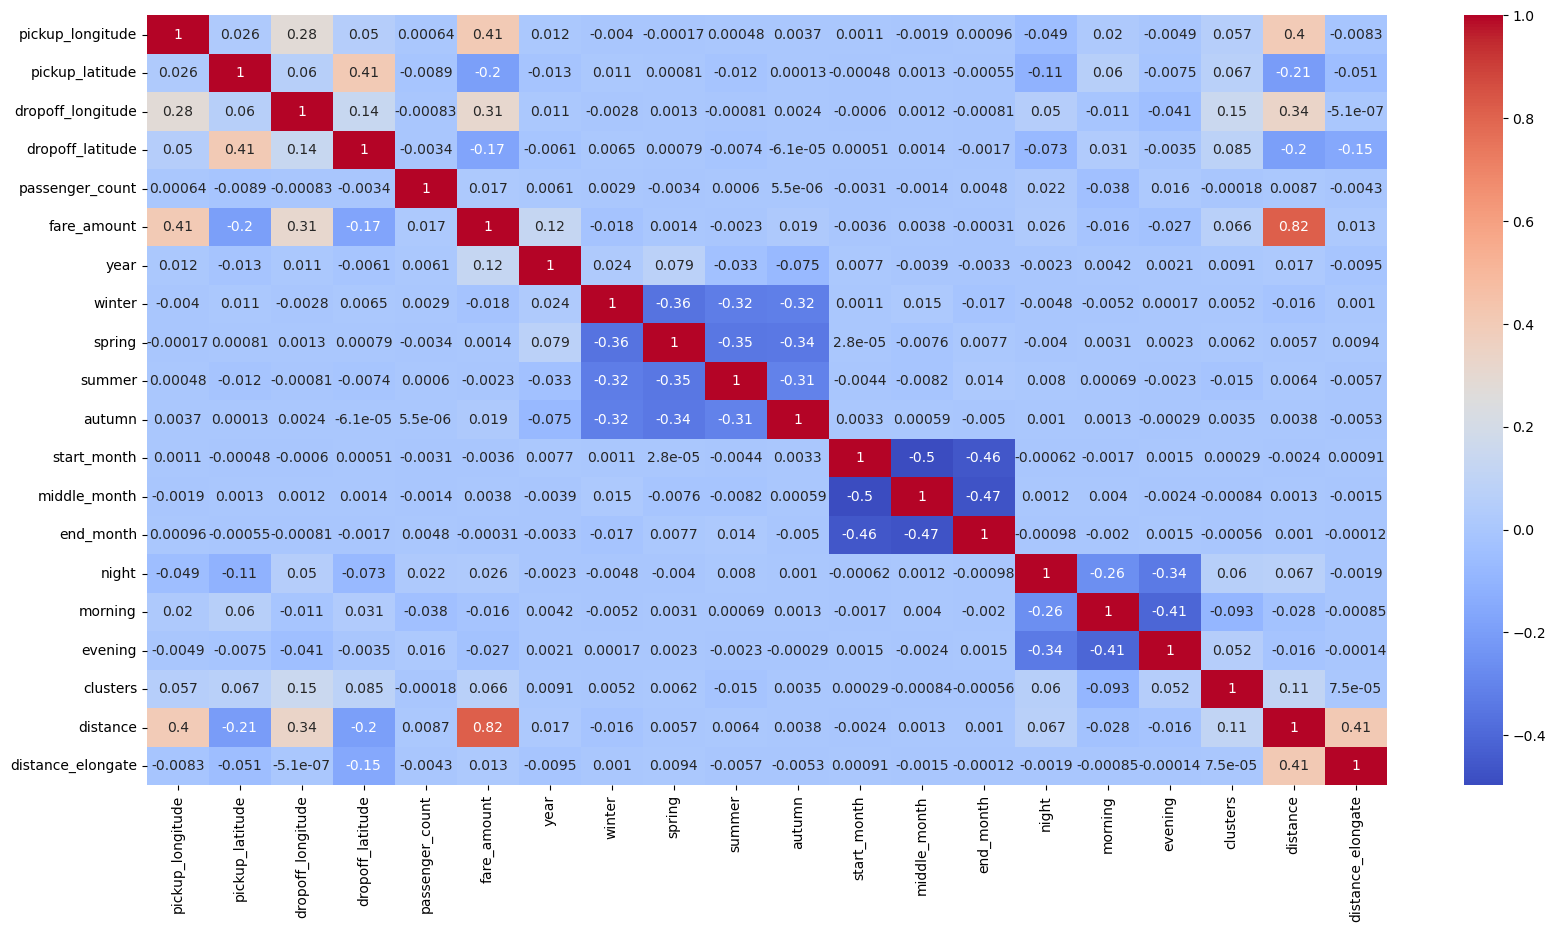

In [33]:
# –ü–æ—Å—Ç—Ä–æ–∏–º –º–∞—Ç—Ä–∏—Ü—É –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –µ—â–µ —Ä–∞–∑ - –æ—á–µ–Ω—å —Å–∏–ª—å–Ω–∞—è –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Å —Ñ–∏—á–µ–π distance

correl = df_new.corr()

plt.figure(figsize=(20, 10))

sns.heatmap(correl, cmap='coolwarm', annot=True)

In [36]:
X = df_new.drop('fare_amount', axis=1)
y = df_new['fare_amount']

In [43]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

([<matplotlib.axis.XTick at 0x2d2a39b10>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18')])

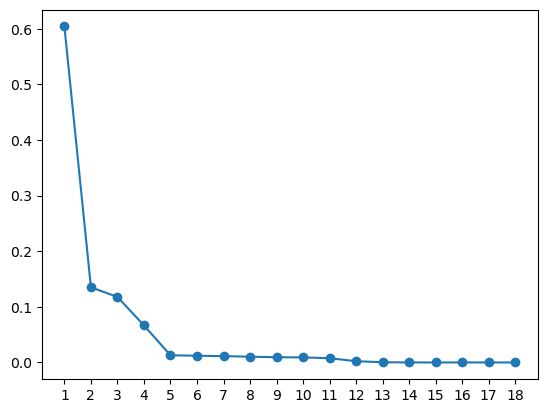

In [39]:
# –ü–æ–ø—Ä–æ–±—É–µ–º —Å–Ω–∏–∂–µ–Ω–∏–µ —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ - –ø–æ—Å–º–æ—Ç—Ä–∏–º —Å–∫–æ–ª—å–∫–æ –∫–æ–º–ø–æ–Ω–µ–Ω—Ç —Å–æ–¥–µ—Ä–∂–∞—Ç –Ω–∞–∏–±–æ–ª—å—à–µ–µ –∫–æ–ª-–≤–æ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏

from sklearn.decomposition import PCA

pca = PCA(n_components=X.shape[1])
pca.fit_transform(X)

var = pca.explained_variance_ratio_

n_comp = np.arange(X.shape[1]) + 1

plt.plot(n_comp, var, marker = 'o')

plt.xticks(np.arange(1, 19))


In [40]:
# –°–¥–µ–ª–∞–µ–º –†–°–ê –¥–ª—è 4 –∫–æ–º–ø–æ–Ω–µ–Ω—Ç, –ø–æ—Å–º–æ—Ç—Ä–∏–º –∫–∞–∫–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –≤–Ω–æ—Å—è—Ç –æ—Å–Ω–æ–≤–Ω–æ–π –≤–∫–ª–∞–¥

pca = PCA(n_components=4)

pca.fit_transform(X)

components = pca.components_

components_df = pd.DataFrame(components, columns=X.columns)

# –í—ã–±–∏—Ä–∞–µ–º 10 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å –Ω–∞–∏–±–æ–ª—å—à–∏–º–∏ –≤–µ—Å–∞–º–∏

for i, row in components_df.iterrows():
    print(f"Component {i+1}:")
    top_features = row.abs().nlargest(10)  
    print(top_features)
    print()



Component 1:
distance             0.998077
clusters             0.060255
year                 0.010462
night                0.006740
pickup_longitude     0.003710
morning              0.003393
passenger_count      0.003242
dropoff_longitude    0.002953
evening              0.001775
winter               0.001737
Name: 0, dtype: float64

Component 2:
year               0.998206
clusters           0.049604
spring             0.020642
autumn             0.018282
distance           0.013471
summer             0.008427
passenger_count    0.008081
winter             0.006067
start_month        0.002132
evening            0.001397
Name: 1, dtype: float64

Component 3:
clusters             0.996427
distance             0.059748
year                 0.050337
morning              0.024048
evening              0.016508
night                0.011870
summer               0.003825
passenger_count      0.002295
dropoff_latitude     0.002096
dropoff_longitude    0.002006
Name: 2, dtype: float64

Compon

In [42]:
# –ü–æ–ø—Ä–æ–±—É–µ–º –æ—Ç–æ–±—Ä–∞—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–∏ —Å –ø–æ–º–æ—â—å—é RFE
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
import optuna
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [62]:
# –û—Ç–±–µ—Ä–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∏ –ø–æ RFE –∏ SFM

estimators = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'LinearRegression': LinearRegression()
    }

params = {
    'n_features_to_select': np.arange(10, X.shape[1]+1)
}

gs_rfe = GridSearchCV(RFE(estimator=estimators['RandomForest']), params, cv=3, scoring='r2', n_jobs=-1)
gs_rfe.fit(Xtrain.iloc[:10000, :], ytrain.iloc[:10000])

gs_rfe.best_score_, gs_rfe.best_estimator_

(0.8537725512762245,
 RFE(estimator=RandomForestRegressor(random_state=42), n_features_to_select=16))

In [69]:
rfe = gs_rfe.best_estimator_
indices = rfe.get_support(indices=True)
ranks = rfe.ranking_
names = Xtrain.columns.to_list()

ranks_names = list(zip(ranks, names))
ranks_names

[(1, 'pickup_longitude'),
 (1, 'pickup_latitude'),
 (1, 'dropoff_longitude'),
 (1, 'dropoff_latitude'),
 (1, 'passenger_count'),
 (1, 'year'),
 (1, 'winter'),
 (3, 'spring'),
 (1, 'summer'),
 (1, 'autumn'),
 (2, 'start_month'),
 (1, 'middle_month'),
 (1, 'end_month'),
 (1, 'night'),
 (1, 'morning'),
 (1, 'evening'),
 (1, 'clusters'),
 (1, 'distance')]

In [72]:
# SelectFromModel

sfm = SelectFromModel(estimator=RandomForestRegressor(random_state=42))
X_sfm = sfm.fit(Xtrain.iloc[:10000, :], ytrain.values[:10000])



In [75]:
# –í—ã–≤–µ–¥–µ–º Feature_importances_

scores = X_sfm.estimator_.feature_importances_

names = X.columns.to_list()

f_i = pd.DataFrame(scores, index=names).sort_values(by=0, ascending=False)
f_i

0
distance           0.851031
dropoff_longitude  0.041480
pickup_longitude   0.024405
dropoff_latitude   0.021353
year               0.021291
pickup_latitude    0.016082
clusters           0.006768
passenger_count    0.003383
night              0.002103
autumn             0.002015
middle_month       0.001465
morning            0.001343
evening            0.001306
summer             0.001254
end_month          0.001244
winter             0.001210
start_month        0.001141
spring             0.001126

In [77]:
# –ü–æ –æ–±–µ—Ä—Ç–æ—á–Ω—ã–º –º–µ—Ç–æ–¥–∞–º –æ—Ç–±–µ—Ä–µ–º 16 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –¥–ª—è –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏
must_features = f_i.index.to_list()[:-2]


['distance',
 'dropoff_longitude',
 'pickup_longitude',
 'dropoff_latitude',
 'year',
 'pickup_latitude',
 'clusters',
 'passenger_count',
 'night',
 'autumn',
 'middle_month',
 'morning',
 'evening',
 'summer',
 'end_month',
 'winter']

In [92]:
# –û—Å—Ç–∞–≤–∏–º —Ç–æ–ª—å–∫–æ –Ω–∞–∏–±–æ–ª–µ–µ –≤–∞–∂–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏

df_for_training = df_new.loc[:, must_features]
df_for_training

distance  dropoff_longitude  pickup_longitude  dropoff_latitude  year  \
1       1.188573         -73.929097        -73.931612         40.760542  2013   
2       1.668271         -74.007197        -73.997929         40.727725  2012   
3       1.543928         -73.985609        -73.980608         40.755807  2010   
4       2.169588         -73.983280        -74.008884         40.722350  2011   
5       1.892831         -73.960058        -73.973728         40.805453  2010   
...          ...                ...               ...               ...   ...   
615956  0.655768         -73.980528        -73.979049         40.730353  2013   
615957  1.628365         -73.980242        -73.976600         40.759672  2014   
615958  4.519225         -73.953092        -73.987750         40.776787  2012   
615959  1.655085         -74.002797        -73.983165         40.728670  2014   
615960  4.377983         -73.956318        -73.985612         40.694497  2014   

        pickup_latitude  clusters  passenger_count  night  autumn  \
1             40.771060         4              1.0      0       1   
2             40.740983         3              2.0      0       0   
3             40.742449         0              1.0      0       1   
4             40.720314         3              1.0      0       0   
5             40.791937         4              5.0      0       0   
...                 ...       ...              ...    ...     ...   
615956        40.736143         3              1.0      1       0   
615957        40.745290         0              2.0      0       0   
615958        40.745760         4              1.0      1       0   
615959        40.728207         3              1.0      1       0   
615960        40.727010         3              2.0      1       0   

        middle_month  morning  evening  summer  end_month  winter  
1                  1        0        1       0          0       0  
2                  0        0        1       0          1       0  
3                  0        0        0       0          1       0  
4                  1        0        1       0          0       1  
5                  0        0        0       0          0       0  
...              ...      ...      ...     ...        ...     ...  
615956             0        0        0       0          0       1  
615957             0        0        1       0          0       0  
615958             0        0        0       0          1       1  
615959             0        0        0       1          1       0  
615960             0        0        0       0          0       0  

[593280 rows x 16 columns]

–ü–æ–¥–±–µ—Ä–µ–º –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã –∏ –æ–±—É—á–∏–º –º–æ–¥–µ–ª—å LGBMRegressor

In [93]:
X = df_for_training

In [94]:
y = y.apply(lambda x: 0 if x < 0 else x)
ynew = np.log1p(y)


In [97]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, ynew, test_size=0.25, random_state=42)

In [101]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 1000),
        'max_depth': trial.suggest_int('max_depth', 2, 20, step = 2),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-5, 1),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-5, 1)
        #'min_child_samples': trial.suggest_int('min_child_samples', 3, 20)
        
    }
    
    model = LGBMRegressor(**params)
    model.fit(Xtrain, ytrain)
    preds = model.predict(Xtest)
    
    score = r2_score(np.expm1(preds), np.expm1(ytest))
    
    return score

In [102]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)
study.best_params

[I 2024-04-28 00:21:50,603] A new study created in memory with name: no-name-bfc03186-24f5-4e71-8811-10bacad64c9d
/var/folders/46/4js24d154nb0rgs9sp2kxk180000gn/T/ipykernel_1520/1074841113.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1),
/var/folders/46/4js24d154nb0rgs9sp2kxk180000gn/T/ipykernel_1520/1074841113.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-5, 1),
/var/folders/46/4js24d154nb0rgs9sp2kxk180000gn/T/ipykernel_1520/1074841113.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010336 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1311
[LightGBM] [Info] Number of data points in the train set: 444960, number of used features: 16
[LightGBM] [Info] Start training from score 2.333583
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2024-04-28 00:22:01,591] Trial 0 finished with value: 0.8277895373447908 and parameters: {'n_estimators': 508, 'max_depth': 6, 'learning_rate': 0.012631117587323722, 'reg_alpha': 0.041190723872937506, 'reg_lambda': 0.8998621825901536}. Best is trial 0 with value: 0.8277895373447908.
/var/folders/46/4js24d154nb0rgs9sp2kxk180000gn/T/ipykernel_1520/1074841113.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1),
/var/folders/46/4js24d154nb0rgs9sp2kxk180000gn/T/ipykernel_1520/1074841113.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-5, 1),
/var/fo

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010566 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1311
[LightGBM] [Info] Number of data points in the train set: 444960, number of used features: 16
[LightGBM] [Info] Start training from score 2.333583


[I 2024-04-28 00:22:03,503] Trial 1 finished with value: -78771.29629119004 and parameters: {'n_estimators': 184, 'max_depth': 2, 'learning_rate': 3.93271568057575e-05, 'reg_alpha': 0.9513830157590344, 'reg_lambda': 0.00040566273715408435}. Best is trial 0 with value: 0.8277895373447908.
/var/folders/46/4js24d154nb0rgs9sp2kxk180000gn/T/ipykernel_1520/1074841113.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1),
/var/folders/46/4js24d154nb0rgs9sp2kxk180000gn/T/ipykernel_1520/1074841113.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-5, 1),
/var/

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010431 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1311
[LightGBM] [Info] Number of data points in the train set: 444960, number of used features: 16
[LightGBM] [Info] Start training from score 2.333583
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2024-04-28 00:22:24,160] Trial 2 finished with value: 0.8158009567727336 and parameters: {'n_estimators': 824, 'max_depth': 10, 'learning_rate': 0.0061351227981662855, 'reg_alpha': 0.9093400678871342, 'reg_lambda': 0.8339351421389719}. Best is trial 0 with value: 0.8277895373447908.
/var/folders/46/4js24d154nb0rgs9sp2kxk180000gn/T/ipykernel_1520/1074841113.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1),
/var/folders/46/4js24d154nb0rgs9sp2kxk180000gn/T/ipykernel_1520/1074841113.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-5, 1),
/var/fo

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010374 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1311
[LightGBM] [Info] Number of data points in the train set: 444960, number of used features: 16
[LightGBM] [Info] Start training from score 2.333583
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2024-04-28 00:22:35,579] Trial 3 finished with value: 0.857862198702175 and parameters: {'n_estimators': 720, 'max_depth': 10, 'learning_rate': 0.053795485124047124, 'reg_alpha': 0.2616782515707189, 'reg_lambda': 0.059642323524959594}. Best is trial 3 with value: 0.857862198702175.
/var/folders/46/4js24d154nb0rgs9sp2kxk180000gn/T/ipykernel_1520/1074841113.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1),
/var/folders/46/4js24d154nb0rgs9sp2kxk180000gn/T/ipykernel_1520/1074841113.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-5, 1),
/var/fol

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010537 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1311
[LightGBM] [Info] Number of data points in the train set: 444960, number of used features: 16
[LightGBM] [Info] Start training from score 2.333583
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2024-04-28 00:22:38,962] Trial 4 finished with value: -272.9050820396461 and parameters: {'n_estimators': 137, 'max_depth': 10, 'learning_rate': 0.000827279385040636, 'reg_alpha': 0.025484513172518534, 'reg_lambda': 0.12601519665632954}. Best is trial 3 with value: 0.857862198702175.
/var/folders/46/4js24d154nb0rgs9sp2kxk180000gn/T/ipykernel_1520/1074841113.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1),
/var/folders/46/4js24d154nb0rgs9sp2kxk180000gn/T/ipykernel_1520/1074841113.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-5, 1),
/var/f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010468 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1311
[LightGBM] [Info] Number of data points in the train set: 444960, number of used features: 16
[LightGBM] [Info] Start training from score 2.333583
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2024-04-28 00:22:47,070] Trial 5 finished with value: 0.8457959793422843 and parameters: {'n_estimators': 378, 'max_depth': 10, 'learning_rate': 0.03723937210205871, 'reg_alpha': 0.017211217487182986, 'reg_lambda': 0.0011098575681309946}. Best is trial 3 with value: 0.857862198702175.
/var/folders/46/4js24d154nb0rgs9sp2kxk180000gn/T/ipykernel_1520/1074841113.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1),
/var/folders/46/4js24d154nb0rgs9sp2kxk180000gn/T/ipykernel_1520/1074841113.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-5, 1),
/var/

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010444 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1311
[LightGBM] [Info] Number of data points in the train set: 444960, number of used features: 16
[LightGBM] [Info] Start training from score 2.333583


[I 2024-04-28 00:22:47,781] Trial 6 finished with value: -109241.58717486242 and parameters: {'n_estimators': 20, 'max_depth': 16, 'learning_rate': 0.00029057156118137583, 'reg_alpha': 0.007788559777304298, 'reg_lambda': 0.8910715011491932}. Best is trial 3 with value: 0.857862198702175.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


/var/folders/46/4js24d154nb0rgs9sp2kxk180000gn/T/ipykernel_1520/1074841113.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1),
/var/folders/46/4js24d154nb0rgs9sp2kxk180000gn/T/ipykernel_1520/1074841113.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-5, 1),
/var/folders/46/4js24d154nb0rgs9sp2kxk180000gn/T/ipykernel_1520/1074841113.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_l

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010546 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1311
[LightGBM] [Info] Number of data points in the train set: 444960, number of used features: 16
[LightGBM] [Info] Start training from score 2.333583
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2024-04-28 00:23:04,339] Trial 7 finished with value: 0.8230655077095222 and parameters: {'n_estimators': 654, 'max_depth': 10, 'learning_rate': 0.008690801583780789, 'reg_alpha': 0.004814044180020906, 'reg_lambda': 7.613150397117921e-05}. Best is trial 3 with value: 0.857862198702175.
/var/folders/46/4js24d154nb0rgs9sp2kxk180000gn/T/ipykernel_1520/1074841113.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1),
/var/folders/46/4js24d154nb0rgs9sp2kxk180000gn/T/ipykernel_1520/1074841113.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-5, 1),
/var

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010558 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1311
[LightGBM] [Info] Number of data points in the train set: 444960, number of used features: 16
[LightGBM] [Info] Start training from score 2.333583
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2024-04-28 00:23:16,212] Trial 8 finished with value: -144.95683738442492 and parameters: {'n_estimators': 512, 'max_depth': 20, 'learning_rate': 0.00030040596419105426, 'reg_alpha': 0.022066191754533022, 'reg_lambda': 0.002184103503206287}. Best is trial 3 with value: 0.857862198702175.
/var/folders/46/4js24d154nb0rgs9sp2kxk180000gn/T/ipykernel_1520/1074841113.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1),
/var/folders/46/4js24d154nb0rgs9sp2kxk180000gn/T/ipykernel_1520/1074841113.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-5, 1),
/v

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010530 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1311
[LightGBM] [Info] Number of data points in the train set: 444960, number of used features: 16
[LightGBM] [Info] Start training from score 2.333583
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2024-04-28 00:23:27,356] Trial 9 finished with value: 0.8611362290670336 and parameters: {'n_estimators': 796, 'max_depth': 8, 'learning_rate': 0.08839411683287884, 'reg_alpha': 0.8675309311936734, 'reg_lambda': 0.00891963011930682}. Best is trial 9 with value: 0.8611362290670336.
/var/folders/46/4js24d154nb0rgs9sp2kxk180000gn/T/ipykernel_1520/1074841113.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1),
/var/folders/46/4js24d154nb0rgs9sp2kxk180000gn/T/ipykernel_1520/1074841113.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-5, 1),
/var/fold

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010538 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1311
[LightGBM] [Info] Number of data points in the train set: 444960, number of used features: 16
[LightGBM] [Info] Start training from score 2.333583
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-28 00:23:39,605] Trial 10 finished with value: 0.8560556316892547 and parameters: {'n_estimators': 978, 'max_depth': 4, 'learning_rate': 0.7356163477362347, 'reg_alpha': 0.00015405234594586056, 'reg_lambda': 1.1988993074952486e-05}. Best is trial 9 with value: 0.8611362290670336.
/var/folders/46/4js24d154nb0rgs9sp2kxk180000gn/T/ipykernel_1520/1074841113.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1),
/var/folders/46/4js24d154nb0rgs9sp2kxk180000gn/T/ipykernel_1520/1074841113.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-5, 1),
/v

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010540 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1311
[LightGBM] [Info] Number of data points in the train set: 444960, number of used features: 16
[LightGBM] [Info] Start training from score 2.333583
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2024-04-28 00:23:50,007] Trial 11 finished with value: 0.8606862257364998 and parameters: {'n_estimators': 741, 'max_depth': 6, 'learning_rate': 0.18563353458188078, 'reg_alpha': 0.20064664562368634, 'reg_lambda': 0.03331437370267353}. Best is trial 9 with value: 0.8611362290670336.
/var/folders/46/4js24d154nb0rgs9sp2kxk180000gn/T/ipykernel_1520/1074841113.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1),
/var/folders/46/4js24d154nb0rgs9sp2kxk180000gn/T/ipykernel_1520/1074841113.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-5, 1),
/var/fo

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010534 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1311
[LightGBM] [Info] Number of data points in the train set: 444960, number of used features: 16
[LightGBM] [Info] Start training from score 2.333583
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2024-04-28 00:24:03,393] Trial 12 finished with value: 0.8476832091149024 and parameters: {'n_estimators': 999, 'max_depth': 6, 'learning_rate': 0.6537205191183136, 'reg_alpha': 0.0002457791848474222, 'reg_lambda': 0.018852565328673798}. Best is trial 9 with value: 0.8611362290670336.
/var/folders/46/4js24d154nb0rgs9sp2kxk180000gn/T/ipykernel_1520/1074841113.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1),
/var/folders/46/4js24d154nb0rgs9sp2kxk180000gn/T/ipykernel_1520/1074841113.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-5, 1),
/var/

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010546 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1311
[LightGBM] [Info] Number of data points in the train set: 444960, number of used features: 16
[LightGBM] [Info] Start training from score 2.333583
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2024-04-28 00:24:13,750] Trial 13 finished with value: 0.862092619239621 and parameters: {'n_estimators': 832, 'max_depth': 14, 'learning_rate': 0.12647500243239357, 'reg_alpha': 0.16547399165315857, 'reg_lambda': 0.015524075444122782}. Best is trial 13 with value: 0.862092619239621.
/var/folders/46/4js24d154nb0rgs9sp2kxk180000gn/T/ipykernel_1520/1074841113.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1),
/var/folders/46/4js24d154nb0rgs9sp2kxk180000gn/T/ipykernel_1520/1074841113.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-5, 1),
/var/f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010527 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1311
[LightGBM] [Info] Number of data points in the train set: 444960, number of used features: 16
[LightGBM] [Info] Start training from score 2.333583
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2024-04-28 00:24:24,197] Trial 14 finished with value: 0.8632651152049308 and parameters: {'n_estimators': 863, 'max_depth': 14, 'learning_rate': 0.1286622008721571, 'reg_alpha': 1.6621396833233123e-05, 'reg_lambda': 0.005703379466896206}. Best is trial 14 with value: 0.8632651152049308.
/var/folders/46/4js24d154nb0rgs9sp2kxk180000gn/T/ipykernel_1520/1074841113.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1),
/var/folders/46/4js24d154nb0rgs9sp2kxk180000gn/T/ipykernel_1520/1074841113.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-5, 1),
/v

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010541 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1311
[LightGBM] [Info] Number of data points in the train set: 444960, number of used features: 16
[LightGBM] [Info] Start training from score 2.333583
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2024-04-28 00:24:33,737] Trial 15 finished with value: 0.8606109436151581 and parameters: {'n_estimators': 883, 'max_depth': 14, 'learning_rate': 0.23811035524495275, 'reg_alpha': 2.274471335057997e-05, 'reg_lambda': 0.008853770145191134}. Best is trial 14 with value: 0.8632651152049308.
/var/folders/46/4js24d154nb0rgs9sp2kxk180000gn/T/ipykernel_1520/1074841113.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1),
/var/folders/46/4js24d154nb0rgs9sp2kxk180000gn/T/ipykernel_1520/1074841113.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-5, 1),
/v

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010528 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1311
[LightGBM] [Info] Number of data points in the train set: 444960, number of used features: 16
[LightGBM] [Info] Start training from score 2.333583
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2024-04-28 00:24:48,540] Trial 16 finished with value: -0.044661940484550744 and parameters: {'n_estimators': 613, 'max_depth': 14, 'learning_rate': 0.002232966013621772, 'reg_alpha': 0.0011672146088748069, 'reg_lambda': 0.0002821462678762168}. Best is trial 14 with value: 0.8632651152049308.
/var/folders/46/4js24d154nb0rgs9sp2kxk180000gn/T/ipykernel_1520/1074841113.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1),
/var/folders/46/4js24d154nb0rgs9sp2kxk180000gn/T/ipykernel_1520/1074841113.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-5, 1

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010552 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1311
[LightGBM] [Info] Number of data points in the train set: 444960, number of used features: 16
[LightGBM] [Info] Start training from score 2.333583
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2024-04-28 00:24:57,394] Trial 17 finished with value: 0.8402397519927074 and parameters: {'n_estimators': 373, 'max_depth': 18, 'learning_rate': 0.027503505633565288, 'reg_alpha': 1.2010511314271395e-05, 'reg_lambda': 0.14705184031083018}. Best is trial 14 with value: 0.8632651152049308.
/var/folders/46/4js24d154nb0rgs9sp2kxk180000gn/T/ipykernel_1520/1074841113.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1),
/var/folders/46/4js24d154nb0rgs9sp2kxk180000gn/T/ipykernel_1520/1074841113.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-5, 1),
/

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010537 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1311
[LightGBM] [Info] Number of data points in the train set: 444960, number of used features: 16
[LightGBM] [Info] Start training from score 2.333583
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2024-04-28 00:25:17,815] Trial 18 finished with value: -18031.415877902713 and parameters: {'n_estimators': 889, 'max_depth': 14, 'learning_rate': 1.606058900871361e-05, 'reg_alpha': 0.0004882589349228449, 'reg_lambda': 0.004940587293665252}. Best is trial 14 with value: 0.8632651152049308.
/var/folders/46/4js24d154nb0rgs9sp2kxk180000gn/T/ipykernel_1520/1074841113.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1),
/var/folders/46/4js24d154nb0rgs9sp2kxk180000gn/T/ipykernel_1520/1074841113.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-5, 1),

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010523 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1311
[LightGBM] [Info] Number of data points in the train set: 444960, number of used features: 16
[LightGBM] [Info] Start training from score 2.333583
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2024-04-28 00:25:25,255] Trial 19 finished with value: 0.8626186296291845 and parameters: {'n_estimators': 654, 'max_depth': 16, 'learning_rate': 0.21188406206342128, 'reg_alpha': 5.137715099932653e-05, 'reg_lambda': 0.001391055258343074}. Best is trial 14 with value: 0.8632651152049308.


{'n_estimators': 863,
 'max_depth': 14,
 'learning_rate': 0.1286622008721571,
 'reg_alpha': 1.6621396833233123e-05,
 'reg_lambda': 0.005703379466896206}

In [104]:
model_lgbm = LGBMRegressor(**study.best_params)
model_lgbm.fit(Xtrain, ytrain)

preds_lgbm = model_lgbm.predict(Xtest)
r2_score(np.expm1(ytest), np.expm1(preds_lgbm))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010340 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1311
[LightGBM] [Info] Number of data points in the train set: 444960, number of used features: 16
[LightGBM] [Info] Start training from score 2.333583
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


0.8835520312824028

In [ ]:
–¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º —Å –ø—Ä–∏–∑–Ω–∞–∫–æ–º distance –ø–æ—Å–ª–µ —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏ –≤—ã–±—Ä–æ—Å–æ–≤ —Å –ø–æ–º–æ—â—å—é –∞–ª–≥–æ—Ä–∏—Ç–º–∞ –º–æ–¥–∏—Ñ–∏–∫–∞—Ü–∏–∏ –ì–ë - LGBMRegressor
—É–¥–∞–ª–æ—Å—å –¥–æ–±–∏—Ç—å—Å—è –≤—ã—Å–æ–∫–æ–≥–æ –∫–∞—á–µ—Å—Ç–≤–∞ –ø—Ä–æ–≥–Ω–æ–∑–∞ —Ü–µ–Ω –Ω–∞ –ø–æ–µ–∑–¥–∫–∏ –Ω–∞ —Ç–∞–∫—Å–∏ )